# Guiding questions

How does postdoctorate racial diversity at Columbia compare to its peer institutions in broad fields?

In [1]:
from collections import defaultdict
import math
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
TOTALS = pickle.load(open('../../../data/Broad_Sex_RaceEthnicity_Postdoctorates.p', 'rb'))

years = sorted(TOTALS.keys())
institutions = sorted(TOTALS[ max(years) ].keys())
fields = sorted(TOTALS[ max(years) ]['Columbia University in the City of New York'].keys())
race_ethnicities = sorted(TOTALS[ max(years) ]['Columbia University in the City of New York'][ fields[0] ]['Female'].keys())
race_ethnicities.remove('Total for selected values')

print(f'Data set describes years {min(years)} - {max(years)} for the following institutions: {institutions}.')

Data set describes years 1994 - 2016 for the following institutions: ['Brown University', 'Columbia University in the City of New York', 'Cornell University', 'Dartmouth College', 'Duke University', 'Harvard University', 'Massachusetts Institute of Technology', 'Princeton University', 'Stanford University', 'University of Pennsylvania', 'Yale University'].


In [13]:
# Convenient function for making subplots for every institution
def subplots(num=len(institutions), size=10, cols=2):
    rows = math.ceil(num / cols)
    return plt.subplots(rows, cols, figsize=(size * cols, size * rows))

In [14]:
def get_proportions(inst, field, race):
    proportions = []
    for year in years:
        field_counts = TOTALS[year][inst].get(field, None)
        if field_counts is None:
            proportions.append(None)
            continue
        total = field_counts['Total for selected values']['Total for selected values']
        female = field_counts.get('Female', {}).get(race, 0)
        male = field_counts.get('Male', {}).get(race, 0)
        proportions.append((male + female) / total)
    return proportions

# Plots the proportion stackplot of a field
def plot_proportions(ax, field, race, highlight='Columbia University in the City of New York'):
    for inst in institutions:
        if inst != highlight:
            ax.plot(years, get_proportions(inst, field, race), label=inst)
    ax.plot(years, get_proportions(highlight, field, race), label=highlight, linewidth=3)

    ax.set_title(field)
    ax.set_xlabel('Year')
    ax.set_ylim(bottom=0)

    # Format y tick labels to be percentages
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

In [15]:
def compare_insts_by_field(race):
    cols = 3
    fig, axArr = subplots(len(fields), size=5, cols=cols)
    for i, field in enumerate(fields):
        plot_proportions(axArr[ i // cols, i % cols ], field, race)
    fig.tight_layout()

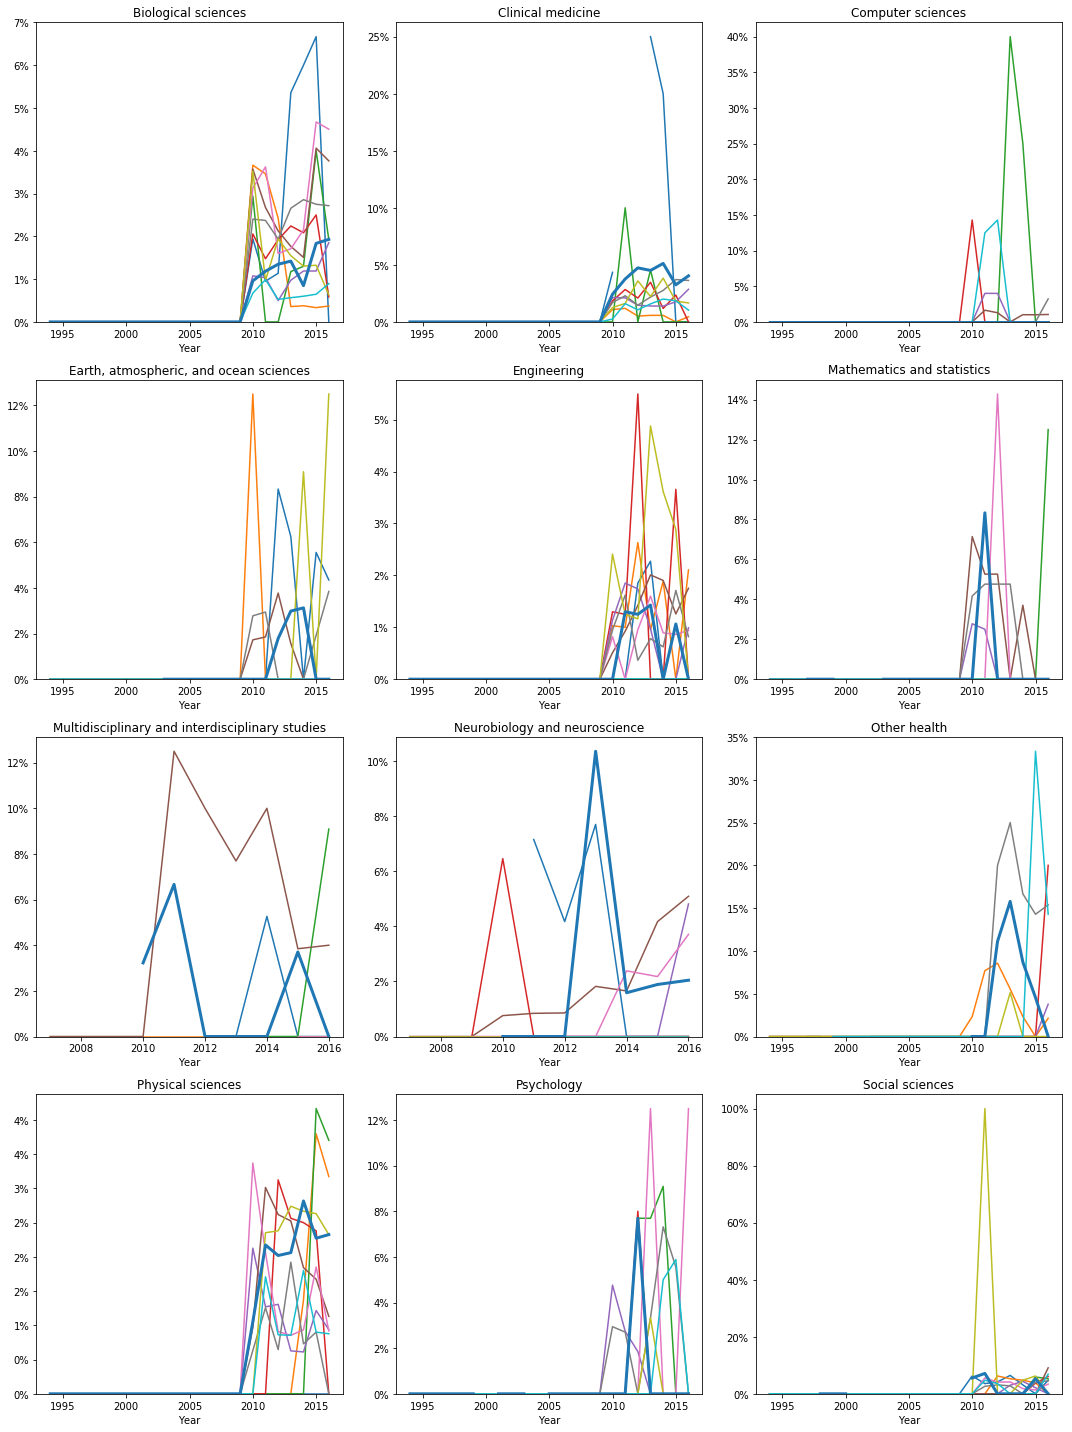

In [7]:
compare_insts_by_field('Hispanic or Latino ethnicity (one or more races)')

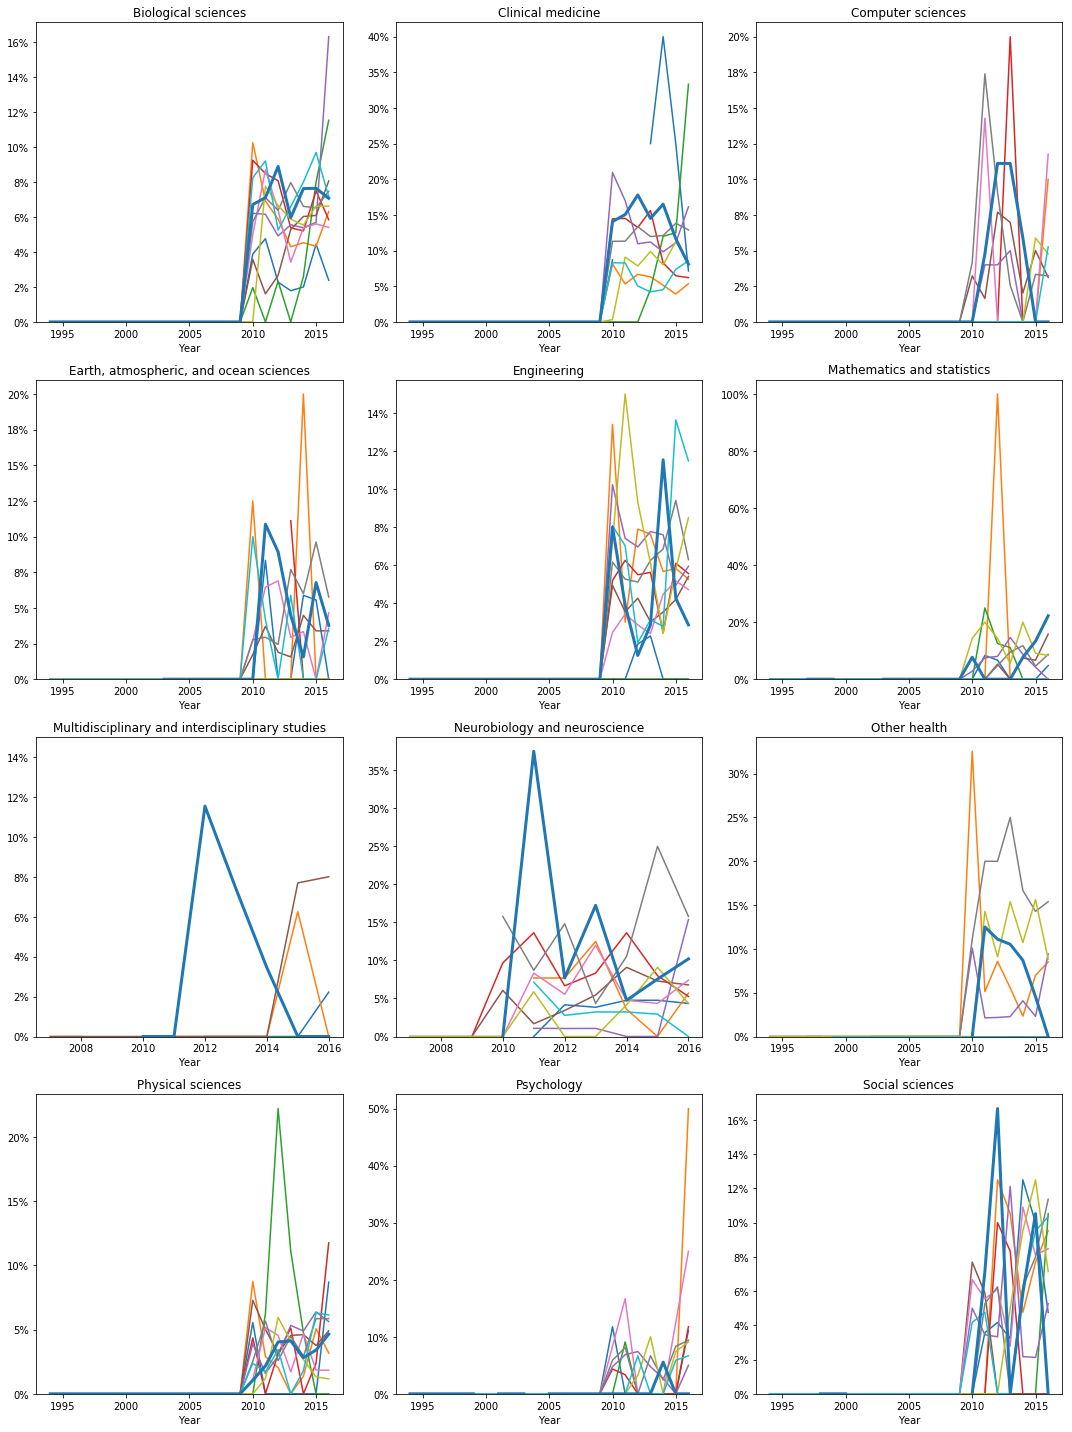

In [8]:
compare_insts_by_field('Non-Hispanic, Asian')

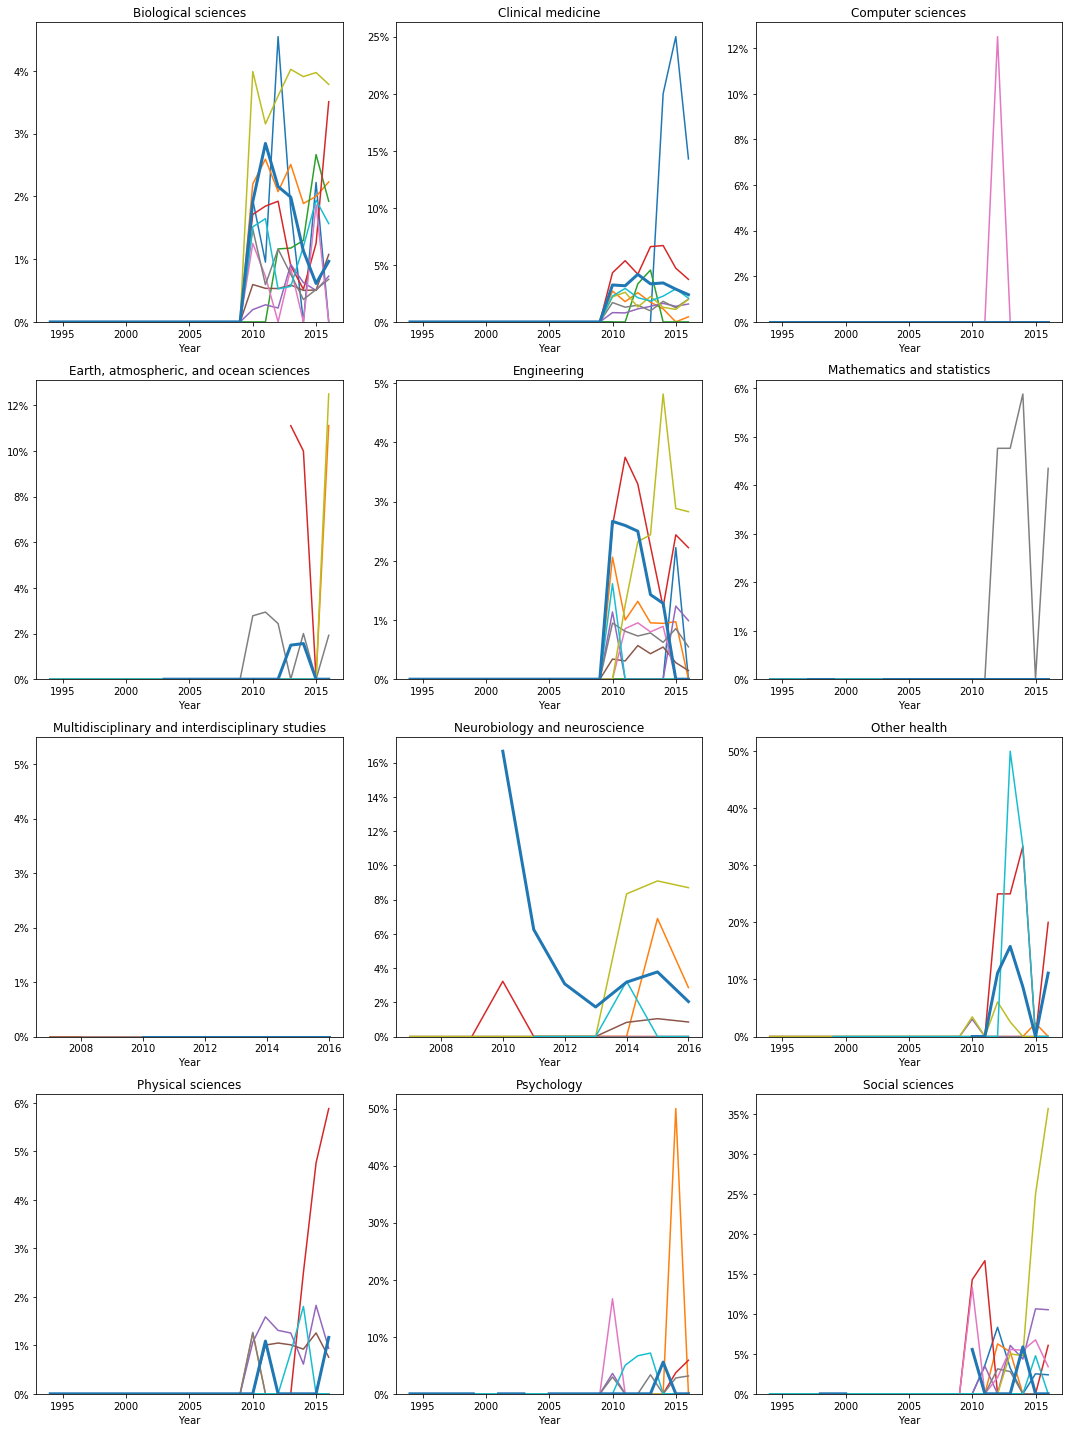

In [9]:
compare_insts_by_field('Non-Hispanic, black or African American')

In [10]:
def plot_populations(ax, inst, field, ymax=None):
    for r in race_ethnicities:
        counts = []
        for year in years:
            field_counts = TOTALS[year][inst].get(field, None)
            if field_counts is None:
                counts.append(None)
                continue
            female = field_counts.get('Female', {}).get(r, 0)
            male = field_counts.get('Male', {}).get(r, 0)
            counts.append(female + male)
        ax.plot(years, counts, label=r, linewidth=2)

    ax.set_title(inst + ', ' + field)
    ax.legend()
    ax.set_xlabel('Year')
    ax.set_ylim(bottom=0, top=ymax)

In [11]:
def examine_field(field):
    fig, ax = subplots(num=2, cols=2, size=10)
    stack_proportions(ax[0], 'Columbia University in the City of New York', field)
    plot_populations(ax[1], 'Columbia University in the City of New York', field, ymax=45)
    fig.tight_layout()

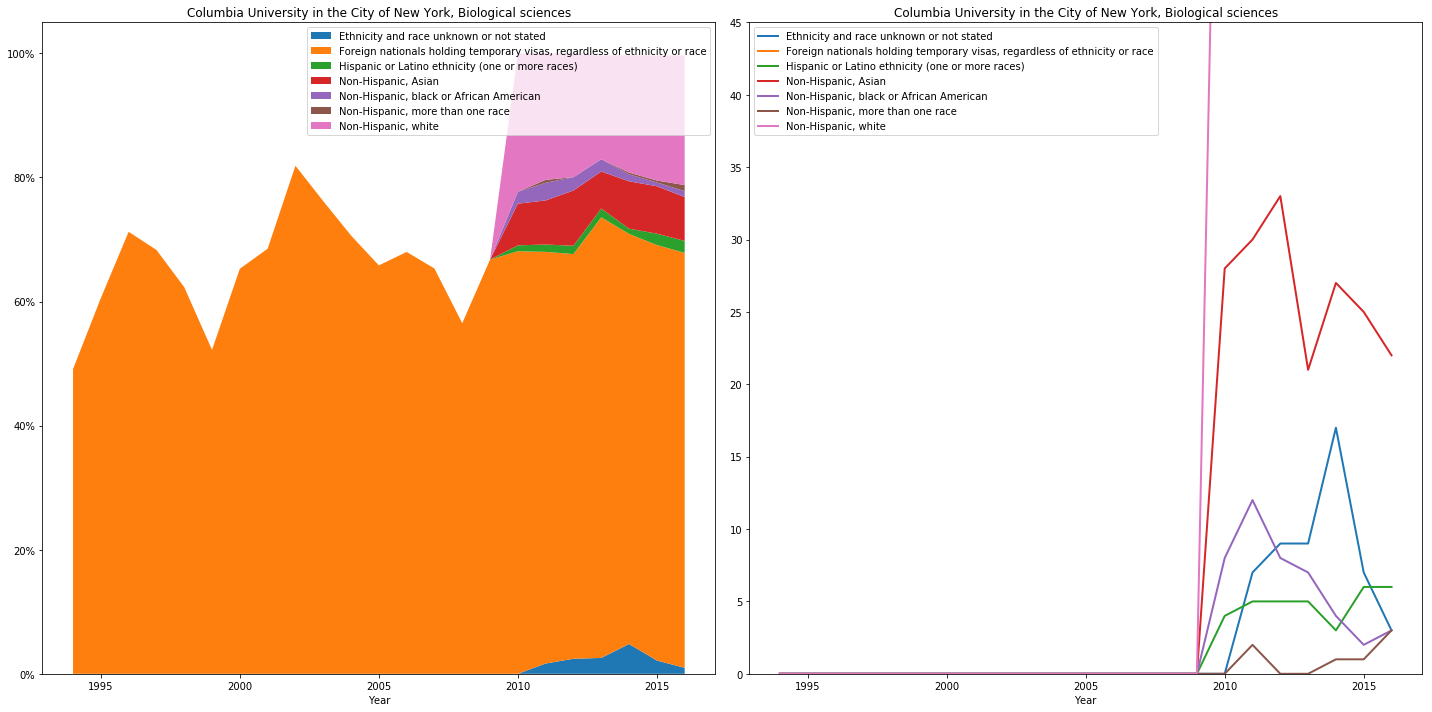

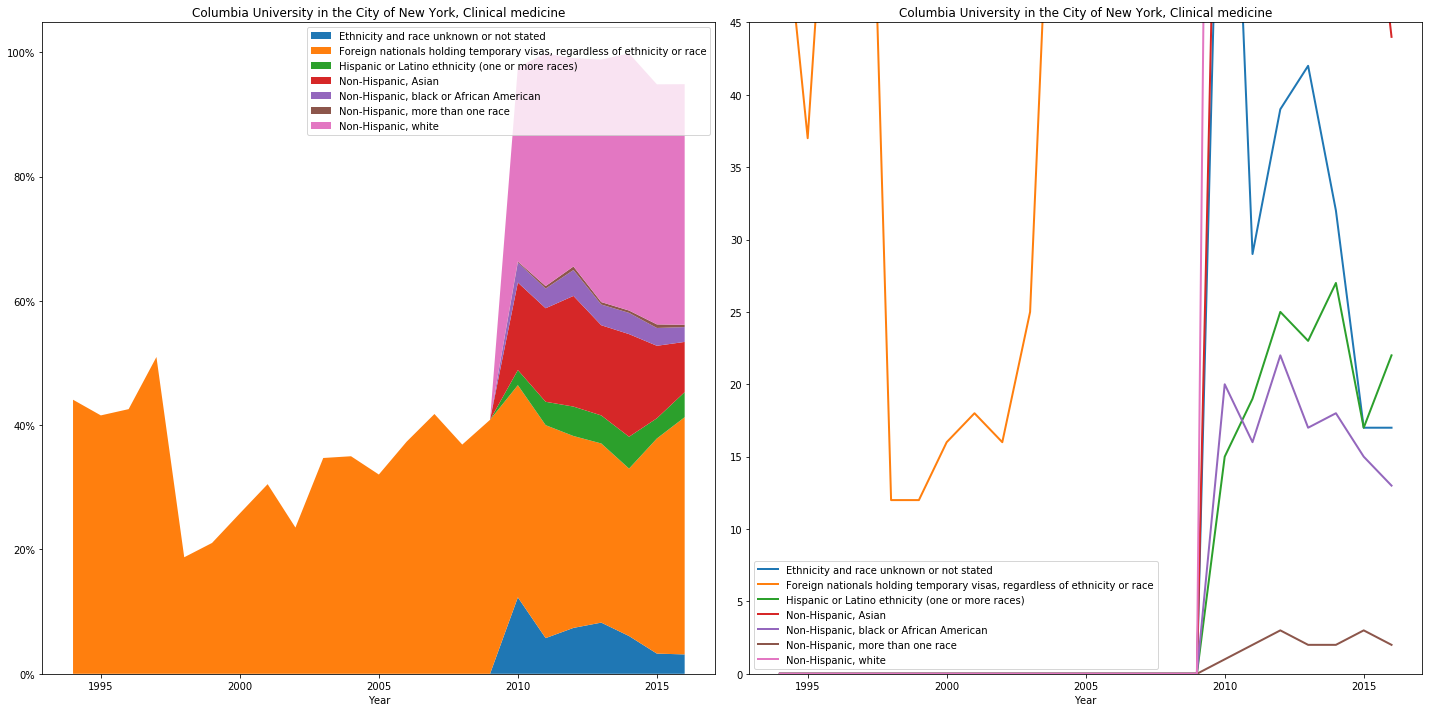

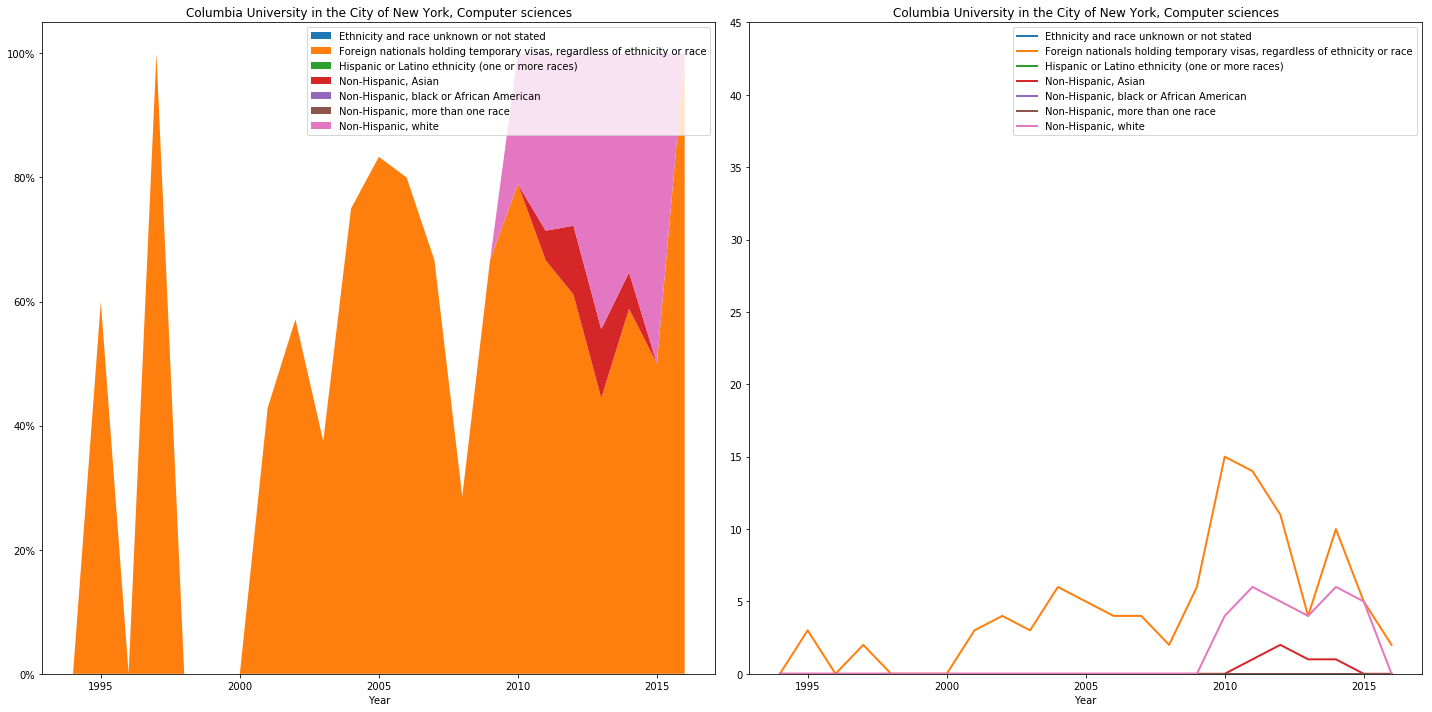

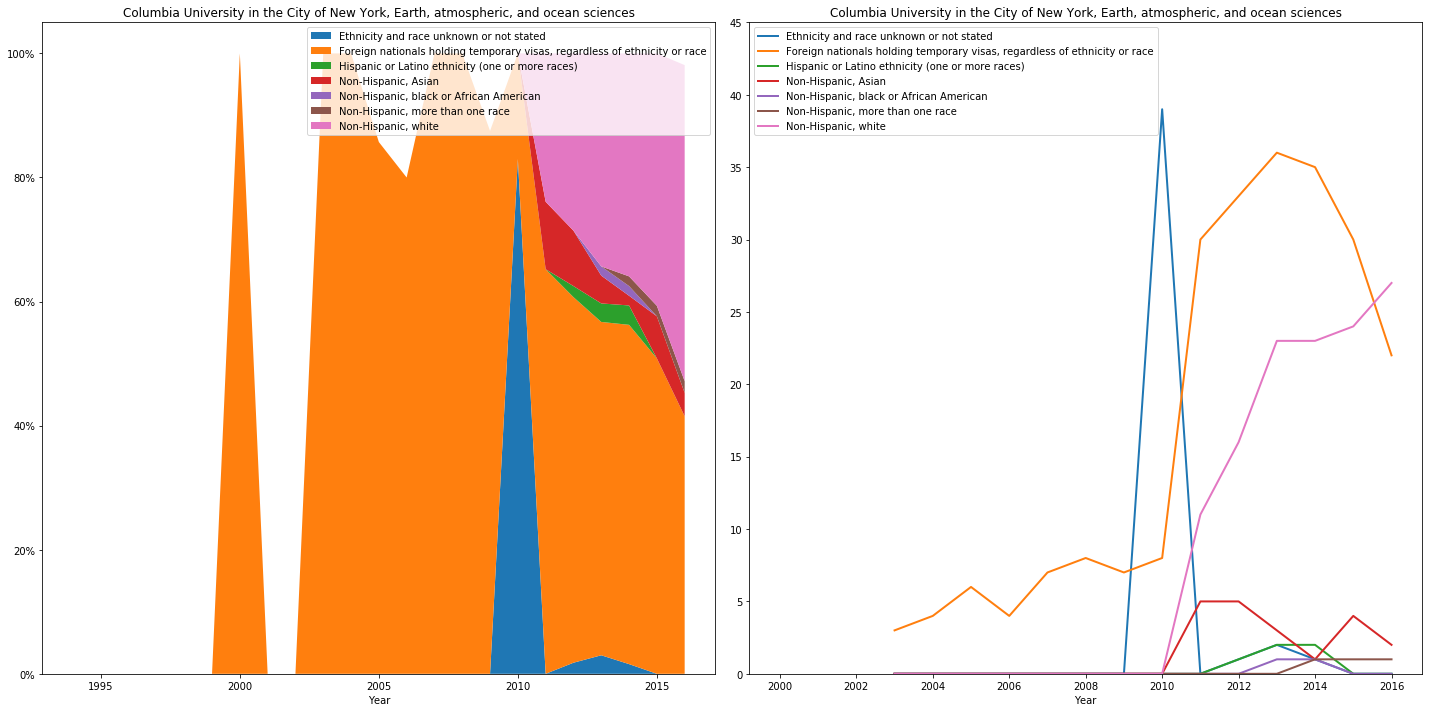

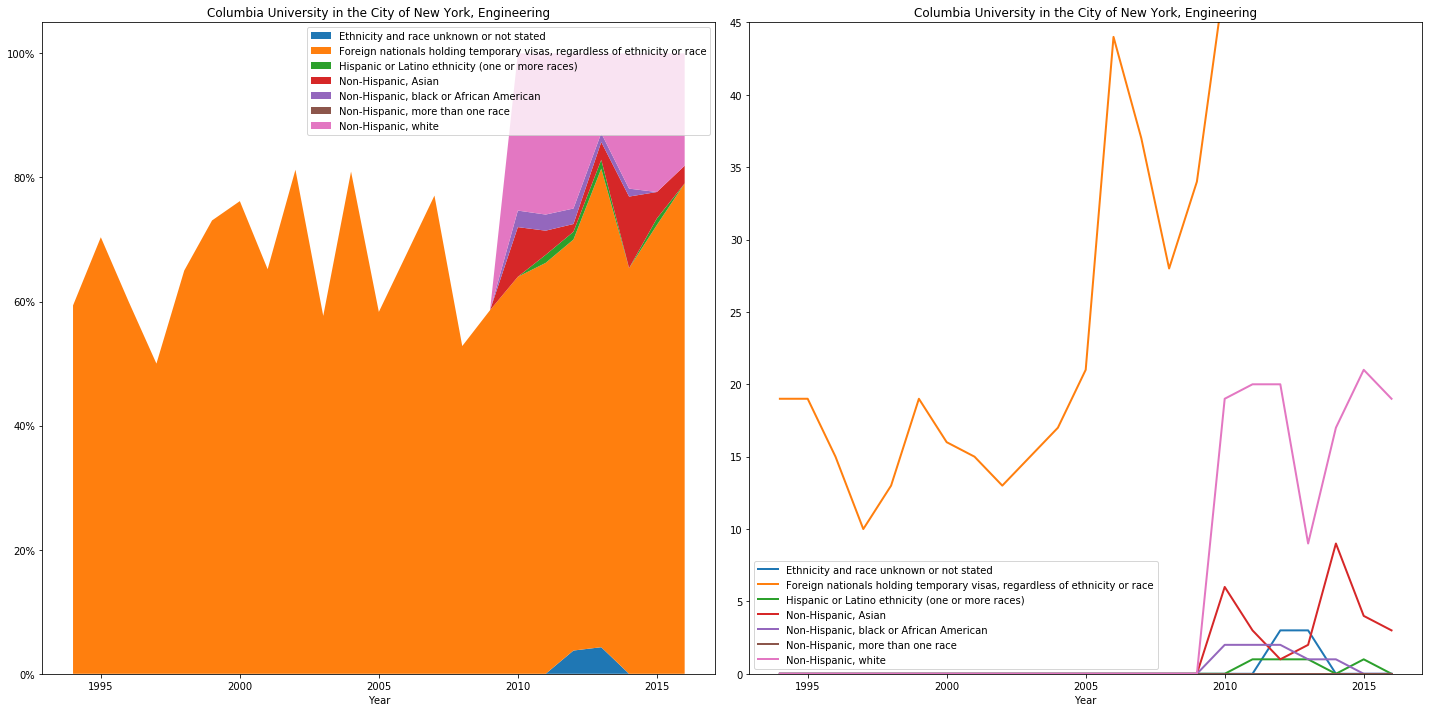

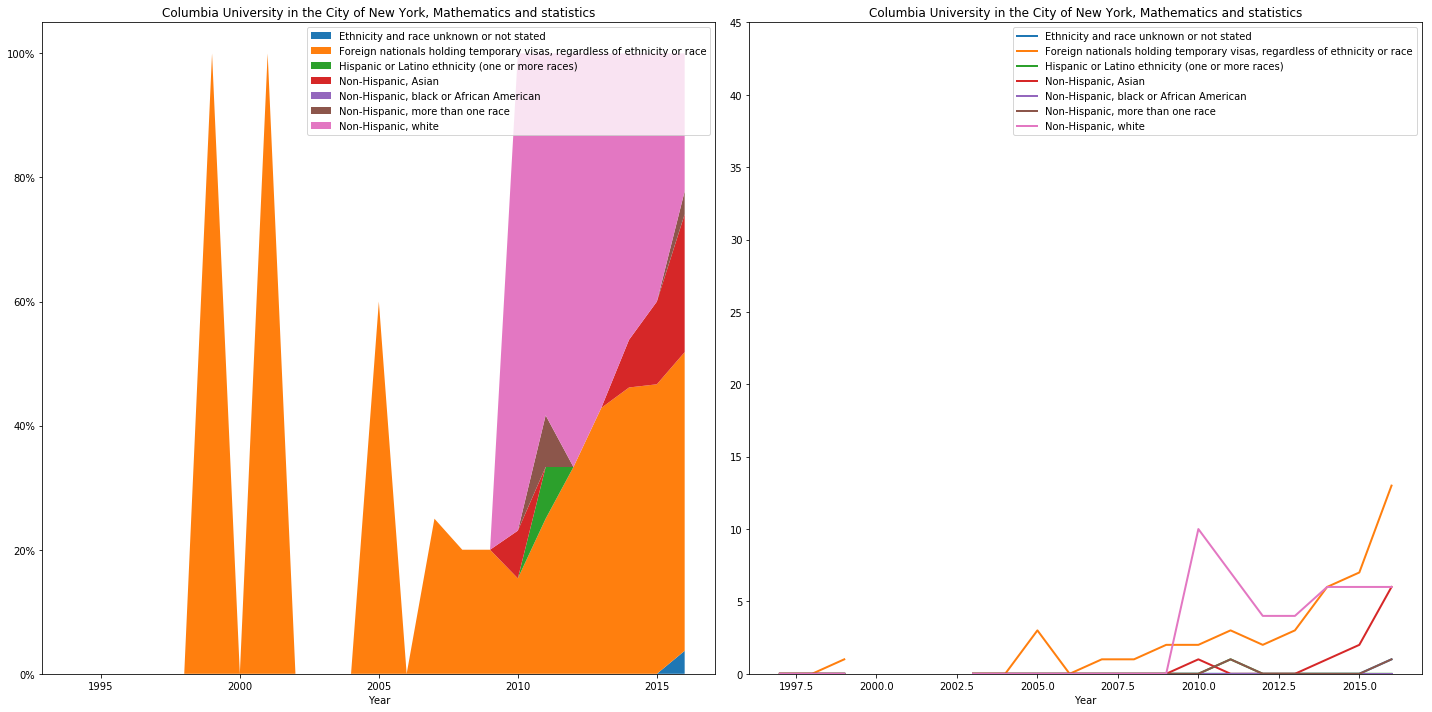

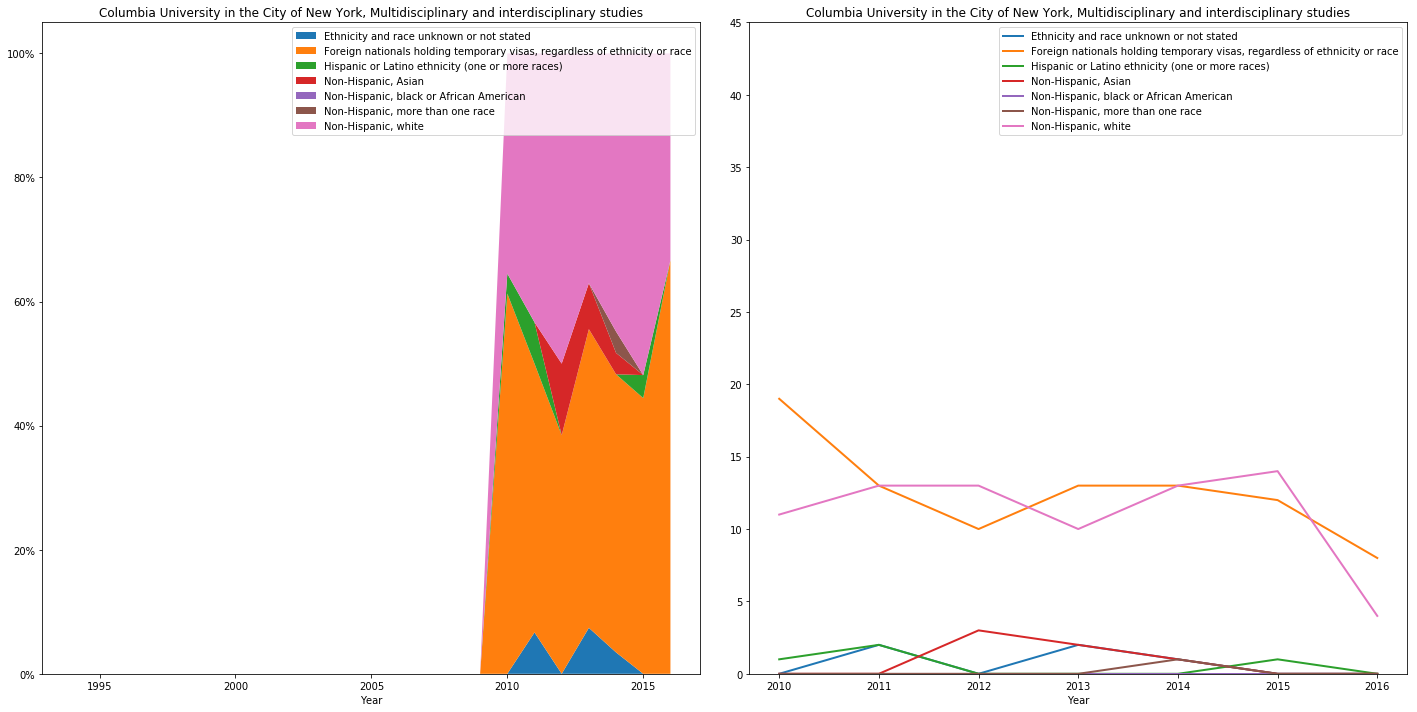

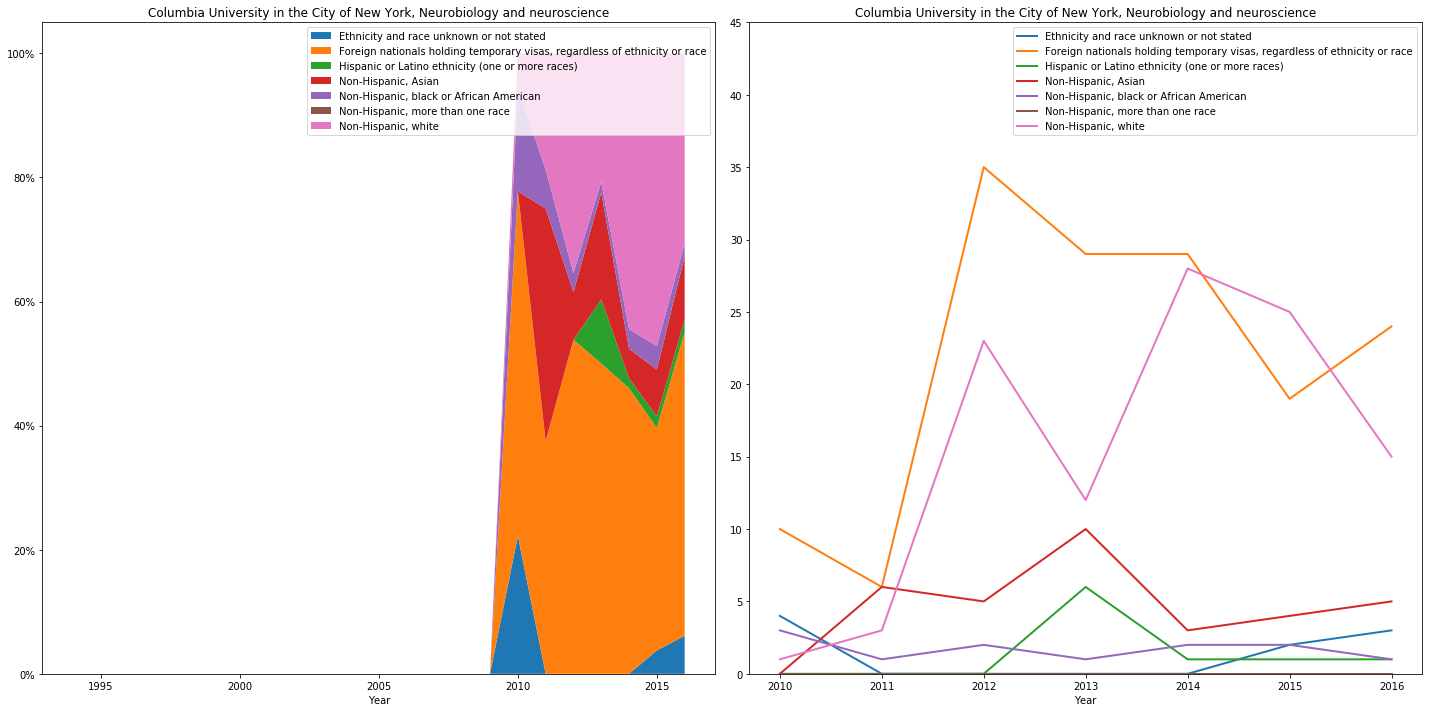

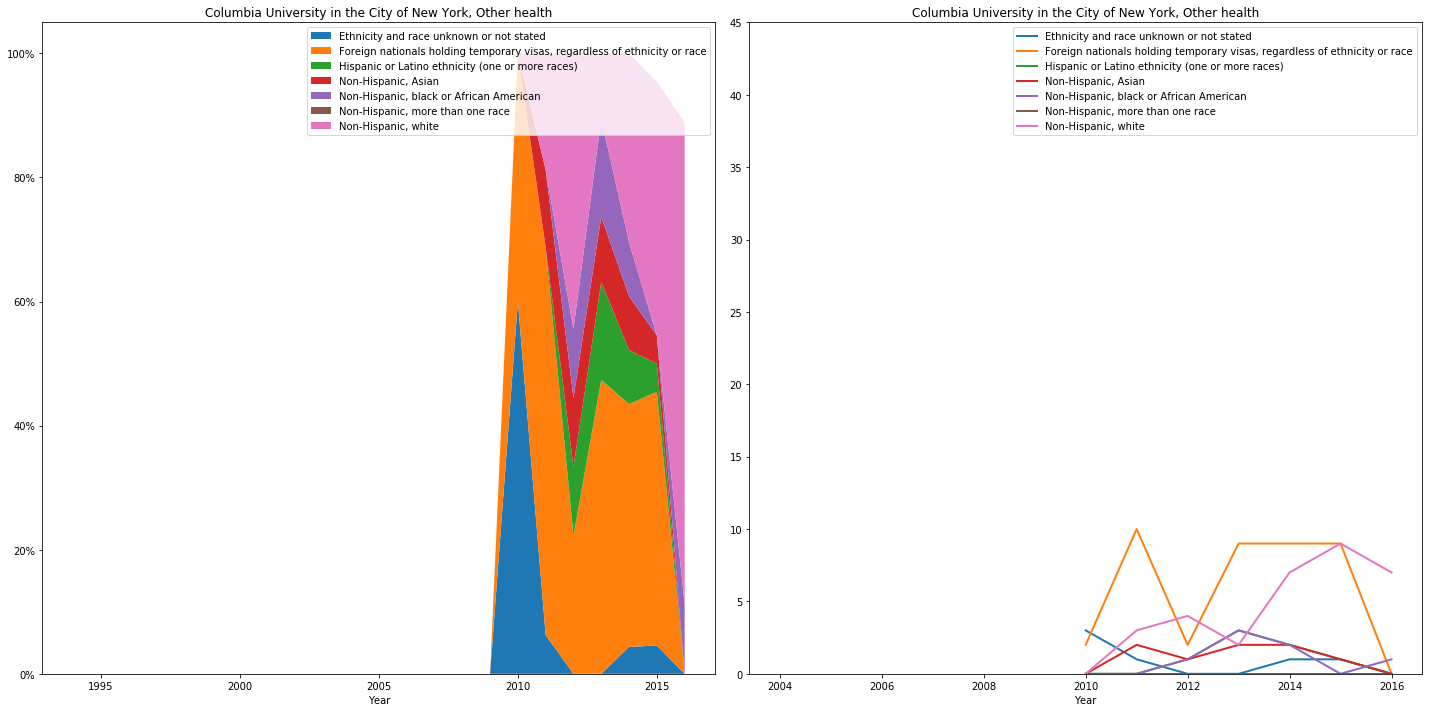

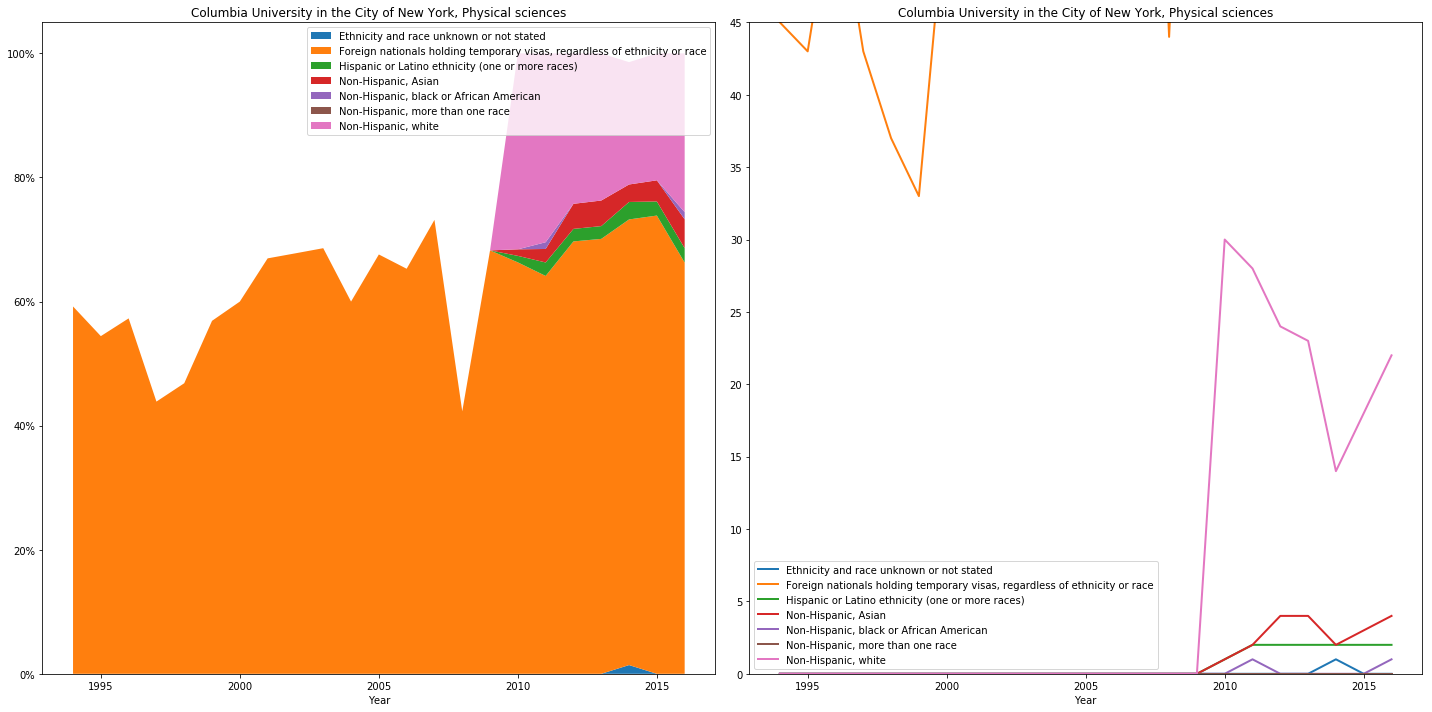

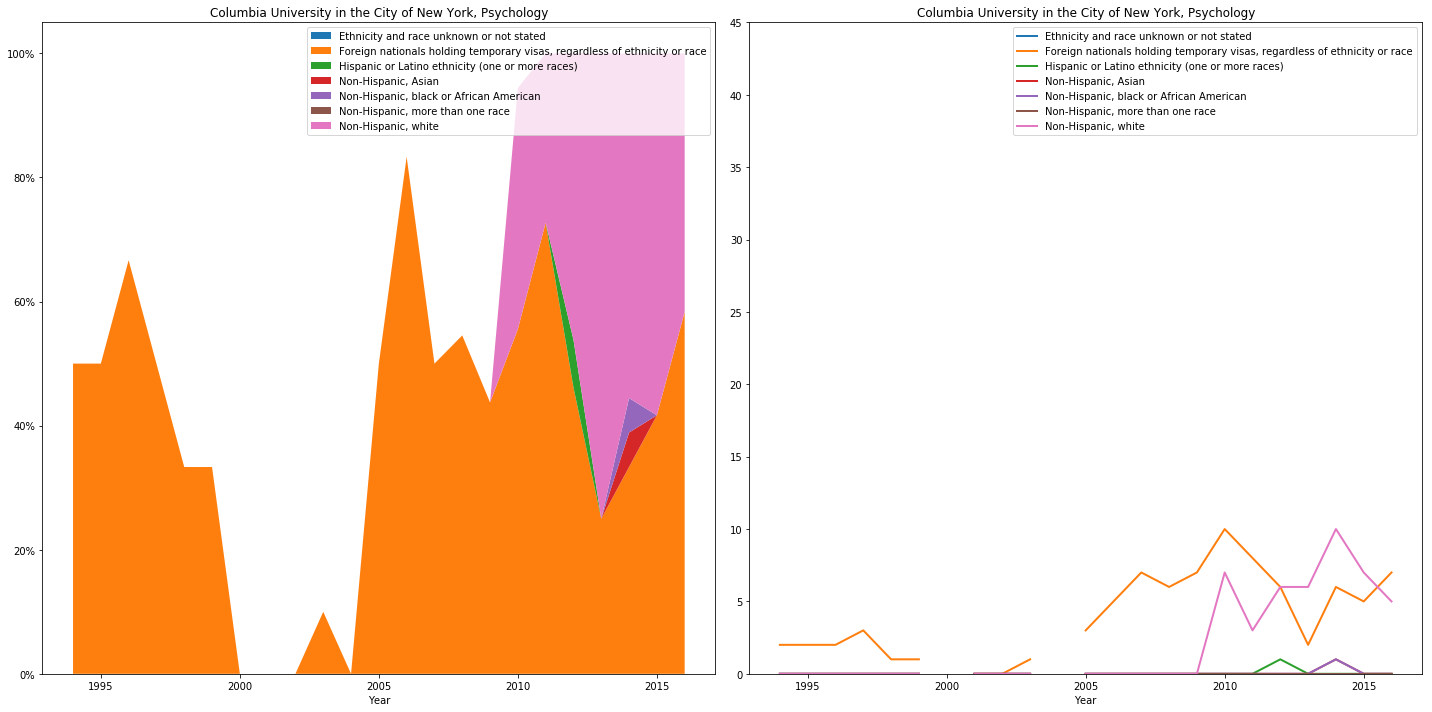

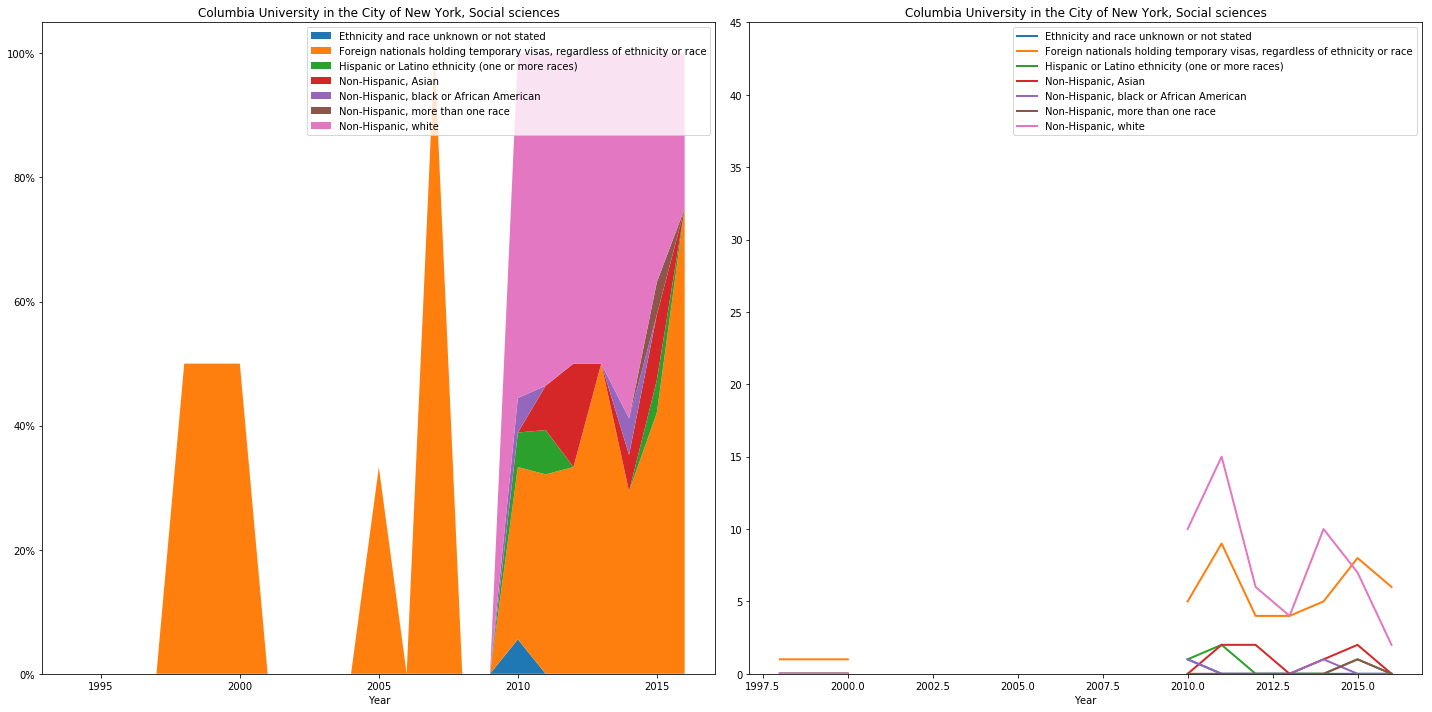

In [12]:
selected_fields = [
    'Engineering', # Hispanic/Latino, Asian, Black
    'Mathematics and statistics', # Hispanic/Latino
    'Social sciences', # Hispanic/Latino
    'Computer sciences', # Hispanic/Latino
    'Other health', # Hispanic/Latino
    'Social sciences', # Hispanic/Latino, Asian
    'Psychology', # Hispanic/Latino, Asian
    'Neurobiology and neuroscience', # Black
]

for field in selected_fields:
    examine_field(field)